In [1]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

# Read and Review the dataset for churn 

### Read csv file

In [3]:
print(os.path.exists("variant_1.csv"))

True


In [4]:
ds = pd.read_csv("variant_1.csv")

In [5]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  34 

columns:  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [6]:
print('Samples count: ',ds.shape[0])

Samples count:  148670


In [7]:
display(ds.head(5))

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0


### Chek missing data

In [8]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [9]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [10]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


### Unique values count

In [11]:
ds.nunique()

Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

### Distribution statistics

In [12]:
ds.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


### Values type descriptions

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

#  Different types of the plots examples

#### Нижче наведені приклади побудови графіків та діаграм різних типів. використовуйте їх для аналізу даних

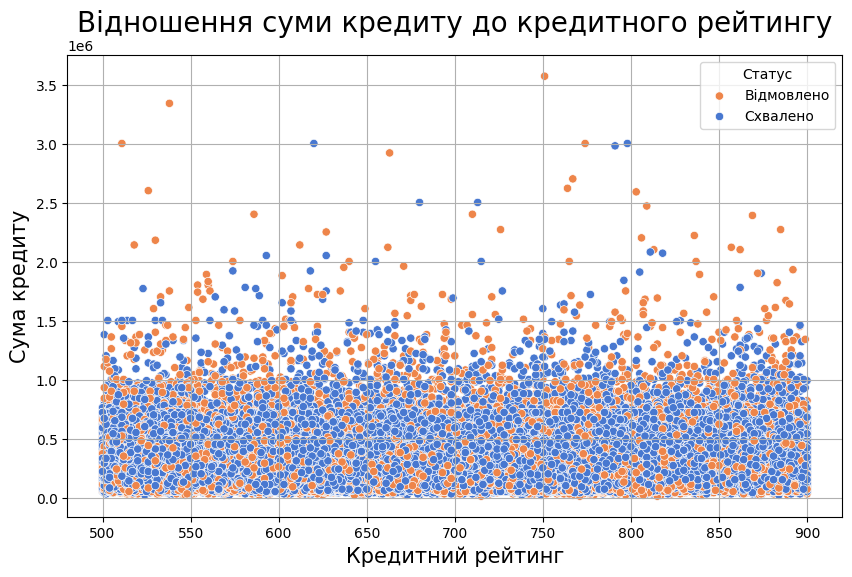

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Credit_Score', y='loan_amount', hue='Status', palette='muted')
plt.title('Відношення суми кредиту до кредитного рейтингу', fontsize=20)
plt.xlabel('Кредитний рейтинг', fontsize=15)
plt.ylabel('Сума кредиту', fontsize=15)
plt.legend(title='Статус', labels=['Відмовлено', 'Схвалено'])
plt.grid()
plt.show()

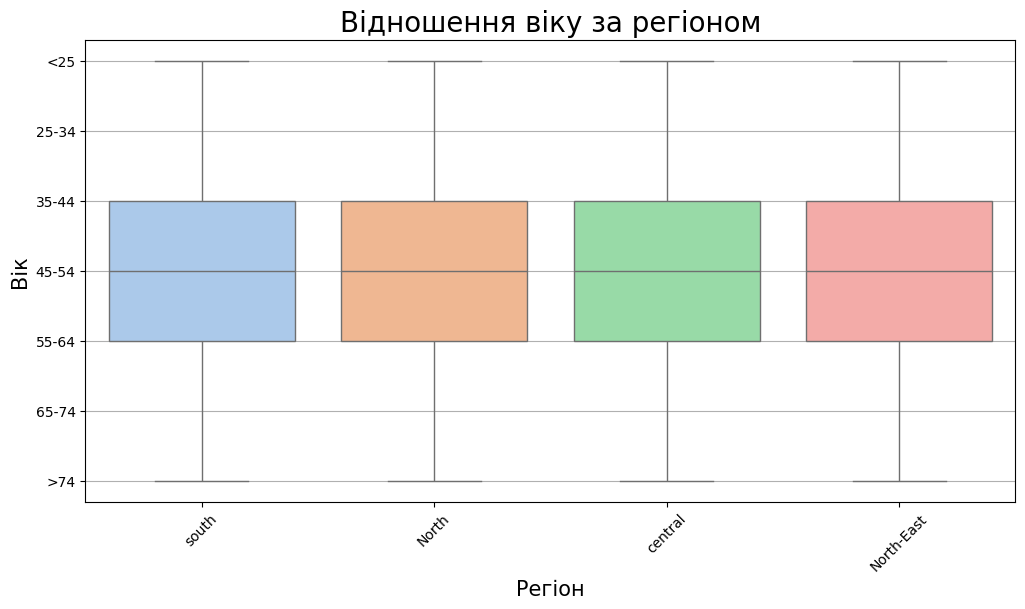

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds, x='Region', y='age', palette='pastel')
plt.title('Відношення віку за регіоном', fontsize=20)
plt.xlabel('Регіон', fontsize=15)
plt.ylabel('Вік', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Порівнявши графіки для користувачів, що покинули компанію та існуючих бачимо - користувачі, що покинули компанію  використовували вихідні дзвінки найчастіше до 150 хв

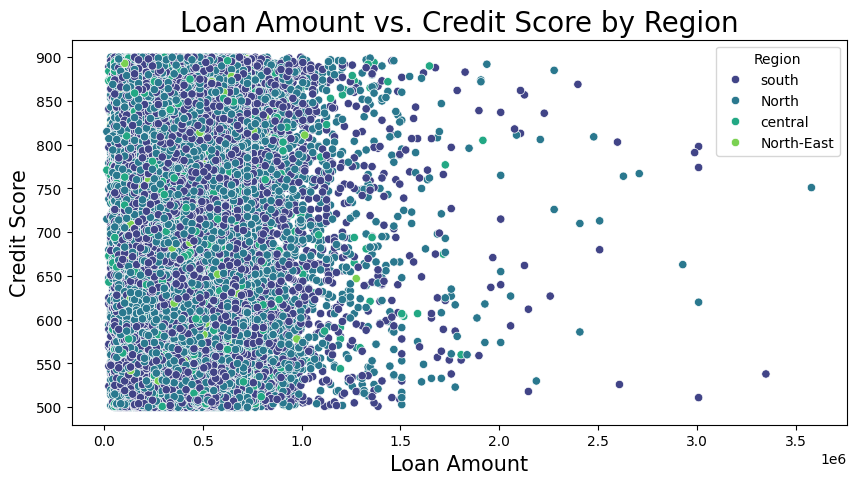

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=ds, x='loan_amount', y='Credit_Score', hue='Region', palette='viridis')
plt.title('Loan Amount vs. Credit Score by Region', fontsize=20)
plt.xlabel('Loan Amount', fontsize=15)
plt.ylabel('Credit Score', fontsize=15)
plt.show()

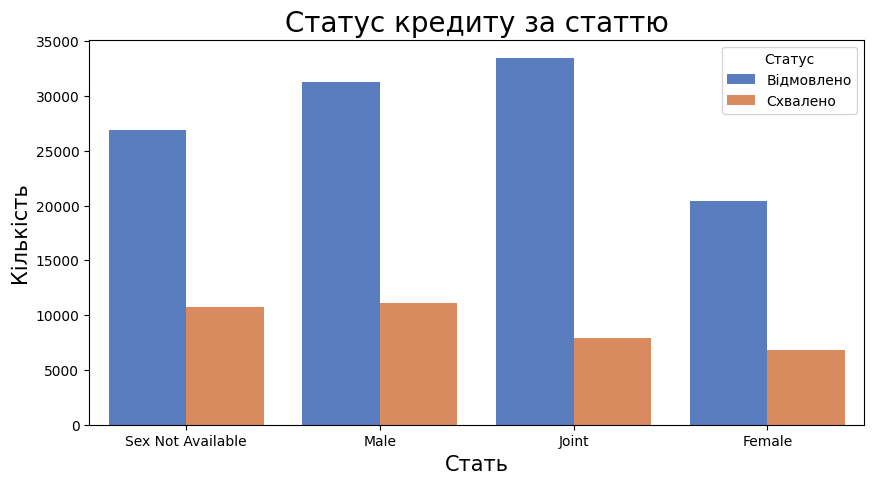

In [62]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='Gender', hue='Status', palette='muted')
plt.title('Статус кредиту за статтю', fontsize=20)
plt.xlabel('Стать', fontsize=15)
plt.ylabel('Кількість', fontsize=15)
plt.legend(title='Статус', labels=['Відмовлено', 'Схвалено'])
plt.show()

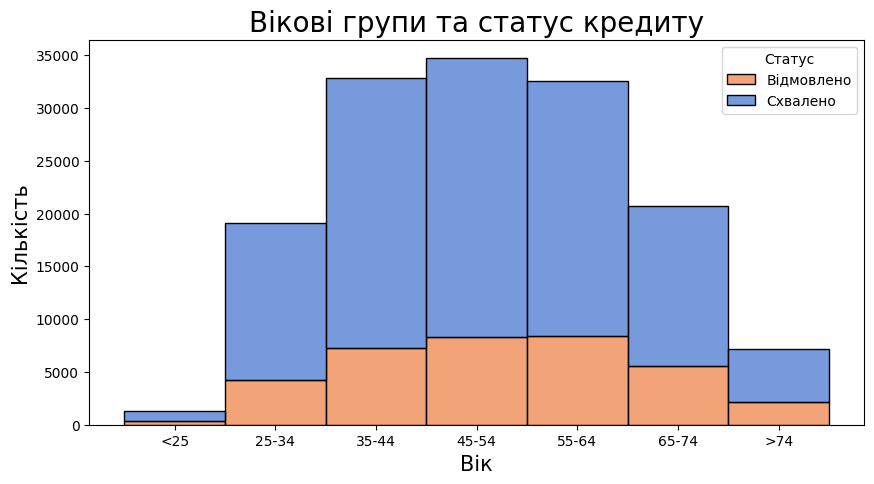

In [76]:
order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
ds['age'] = pd.Categorical(ds['age'], categories=order, ordered=True)

plt.figure(figsize=(10, 5))
sns.histplot(data=ds, x='age', hue='Status', multiple='stack', bins=10, palette='muted')
plt.title("Вікові групи та статус кредиту", fontsize=20)
plt.xlabel('Вік', fontsize=15)
plt.ylabel('Кількість', fontsize=15)
plt.legend(title='Статус', labels=['Відмовлено', 'Схвалено'])
plt.show()

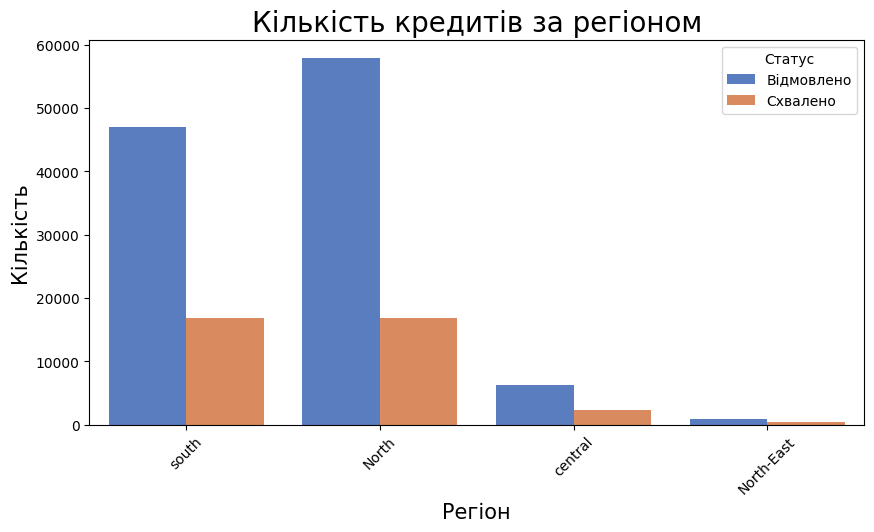

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='Region', hue='Status', palette='muted')
plt.title('Кількість кредитів за регіоном', fontsize=20)
plt.xlabel('Регіон', fontsize=15)
plt.ylabel('Кількість', fontsize=15)
plt.legend(title='Статус', labels=['Відмовлено', 'Схвалено'])
plt.xticks(rotation=45)
plt.show()

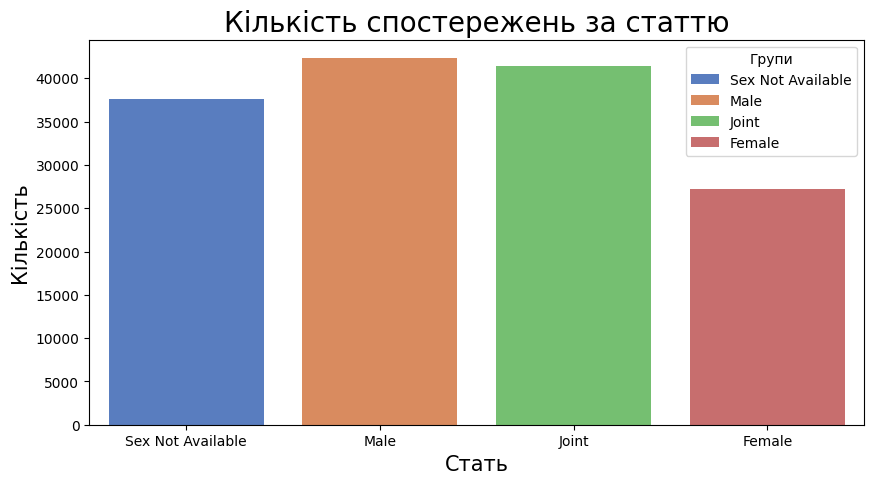

In [68]:
plt.figure(figsize=(10, 5))
sns.countplot(data=ds, x='Gender', palette='muted')
plt.title('Кількість спостережень за статтю', fontsize=20)
plt.xlabel('Стать', fontsize=15)
plt.ylabel('Кількість', fontsize=15)
plt.legend(title='Групи', labels=ds['Gender'].unique())
plt.show()

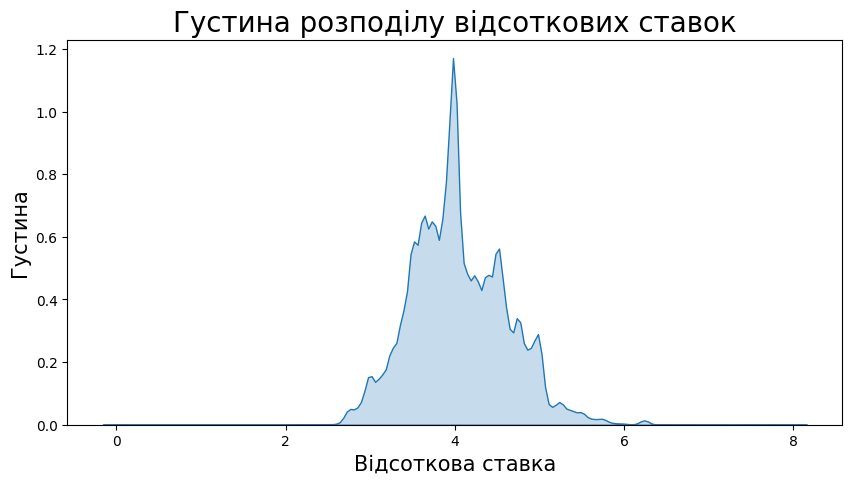

In [75]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=ds['rate_of_interest'], shade=True)
plt.title('Густина розподілу відсоткових ставок', fontsize=20)
plt.xlabel('Відсоткова ставка', fontsize=15)
plt.ylabel('Густина', fontsize=15)
plt.show()

In [ ]:
dict = {'No':0,'Yes':1}
ds["Churn"] = ds["Churn"].map(dict)

In [ ]:
churn_df=ds[ds['Churn']==1]
non_churn_df= ds[ds['Churn']==0]
churned= ds[ds['Churn']==0].shape[0]
notchurned= ds[ds['Churn']==1].shape[0]
print("Total Churned customer {} ".format(churned))

In [ ]:
churn_df.tail(5)

In [ ]:
plt.rcParams["figure.figsize"] = (7,5)
slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of customer churned")
plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
sns.countplot(ds["CreditRating"],hue = ds["Churn"],palette = "dark")

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots() 
sns.boxplot(x=ds["Churn"],y=ds['MonthlyMinutes'],palette = "Reds", ax=ax)

ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines

In [ ]:
col_for_corr = ['Churn', 
                'MonthlyRevenue', 'MonthlyMinutes', 
                'TotalRecurringCharge', 'DirectorAssistedCalls', 
                'OverageMinutes', 'RoamingCalls', 
                'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 
                'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls']

plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds[col_for_corr].corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

In [ ]:

plt.rcParams["figure.figsize"] = (10,5)
graph = ds[["Occupation", "MonthlyRevenue"]]
ax = sns.barplot(x="Occupation", y="MonthlyRevenue", data=graph)

In [ ]:
ds[ds['MonthlyMinutes']<3500]['MonthlyMinutes'].hist(bins=50)

In [ ]:
ds[ds['MonthlyRevenue']<400]['MonthlyRevenue'].hist(bins=50)

In [ ]:
ds[ds['TotalRecurringCharge']<250]['TotalRecurringCharge'].hist(bins=50)

In [ ]:
def plot_distro(df, col = '', y_limit=None, x_limit_r=None, x_limit_l = None):
    plt.figure(figsize=(7,7))
    plt.grid(True)
    sns.distplot(df[col][df.Churn == 1])
    sns.distplot(df[col][df.Churn == 0])
    plt.legend(['churn_flag_yes', 'churn_flag_no'])
    if y_limit:
        plt.ylim(top=y_limit)
    if x_limit_r:
        plt.xlim(right=x_limit_r)
    if x_limit_l:
        plt.xlim(left=x_limit_l)

In [ ]:
plot_distro(ds, col='PercChangeMinutes', x_limit_r=1200, x_limit_l=-1200)

In [ ]:
plot_distro(ds, col='MonthsInService', x_limit_r=80)

In [ ]:
ds['ChurnSubs']=ds['UniqueSubs']-ds['ActiveSubs']

In [ ]:
slices=[ds['ActiveSubs'].sum(),ds['ChurnSubs'].sum()]
labels=['Not Churned','Churned']
explode=[0,0.1]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of subscribers churned")
plt.tight_layout()
plt.show()